In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.animation as ani

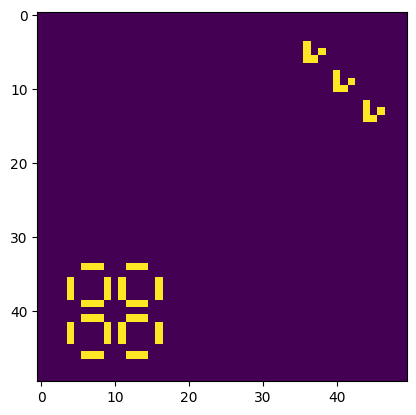

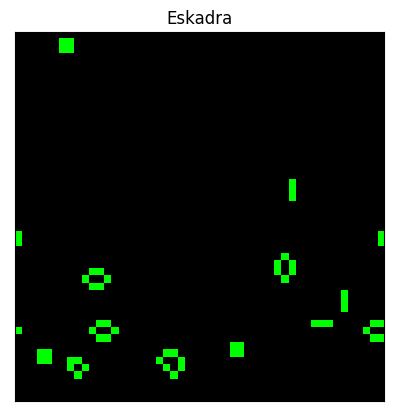

In [24]:
# empty space

space = np.zeros([50, 50])

# glider

glider = space.copy()
glider[23:26, 25] = 1
glider[25, 26] = 1
glider[24, 27] = 1

# tumbler

tumbler = space.copy()
tumbler[22:27, 24] = 1
tumbler[22:27, 26] = 1
tumbler[22:24, 23] = 1
tumbler[22:24, 27] = 1
tumbler[25:28, 28] = 1
tumbler[25:28, 22] = 1
tumbler[27, 23] = 1
tumbler[27, 27] = 1

# diehard

diehard = space.copy()
diehard[25, 21:23] = 1
diehard[24, 22] = 1
diehard[24, 26:29] = 1
diehard[26, 27] = 1

# immortal

immortal = space.copy()
immortal[22, 21] = 1
immortal[22:24, 23] = 1
immortal[24:27, 25] = 1
immortal[25:28, 27] = 1
immortal[26, 28] = 1

# pulsar

pulsar = space.copy()
pulsar[24, 21:24] = 1
pulsar[21:24, 24] = 1
pulsar[19, 21:24] = 1
pulsar[21:24, 19] = 1

pulsar += np.roll(np.rot90(pulsar, 1), shift = 1, axis = 0)
pulsar += np.roll(np.rot90(pulsar, 2), shift = (1, 1), axis = (0, 1))
pulsar += np.roll(np.rot90(pulsar, 3), shift = 1, axis = 1)
pulsar[pulsar == 2] = 1

# collision

collision = np.roll(glider, shift = (-10, 10), axis = (0, 1)) + np.roll(tumbler, shift = (10, -10), axis = (0, 1))

# bombing

bombing = space.copy()
bombing += np.roll(pulsar, shift = (15, -15), axis = (0,1))
bombing += np.roll(glider, shift = (-15, +15), axis = (0,1))
bombing += np.roll(glider, shift = (-19, +11), axis = (0,1))
bombing += np.roll(glider, shift = (-11, +19), axis = (0,1))

# let's choose object type

board = bombing

# single step function

def step(board):
    new_board = board.copy()
    new_board += 9 * board
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            new_board += np.roll(board, shift = (i, j), axis = (0, 1))

    new_board[new_board == 3] = 20
    new_board[new_board == 13] = 20
    new_board[new_board == 14] = 20
    new_board[new_board < 20] = 0
    new_board[new_board == 20] = 1

    return new_board

plt.imshow(board)
plt.show()

# declare animation function

cmap = colors.ListedColormap(['black', 'lime'])
bounds = [0, 1, 2]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure()
im = plt.imshow(board, interpolation = 'none', cmap = cmap, norm = norm)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
im.axes.set_title("Eskadra")

def init():
    im.set_data(board)
    return im,

def animate(i):
    board = im.get_array()
    board = step(board) 
    im.set_array(board)
    return im,

# animate and save it

anim = ani.FuncAnimation(fig, animate, frames = 350, interval = 200, blit = 'True')
anim.save('Eskadra.gif', writer = 'ffmpeg', fps = 10)